In [148]:
# install libraries
%pip install category_encoders==2.5.0
%pip install hyperopt==0.2.7
%pip install lightgbm==3.3.0
%pip install matplotlib==3.5.1
%pip install numpy==1.22.4
%pip install pandas==1.3.0
#%pip install scikit_learn
%pip install seaborn==0.12.0
%pip install shap==0.40.0

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [600 lines of output]
  
  Edit mplsetup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
        python: yes [3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023,
                    18:05:47) [MSC v.1916 64 bit (AMD64)]]
      platform: yes [win32]
         tests: no  [skipping due to configuration]
        macosx: no  [Mac OS-X only]
  
  C:\Users\harsh\anaconda3\Lib\site-packages\setuptools\__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist


  Using cached matplotlib-3.5.1.tar.gz (35.3 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Using cached numpy-1.22.4-cp311-cp311-win_amd64.whl
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
ml-dtypes 0.3.2 requires numpy>=1.23.3; python_version >= "3.11", but you have numpy 1.22.4 which is incompatible.
opencv-python 4.9.0.80 requires numpy>=1.23.5; python_version >= "3.11", but you have numpy 1.22.4 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 1.22.4 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.22.4 which is incompatible.



  Using cached pandas-1.3.0.tar.gz (4.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [319 lines of output]
  Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.9" and platform_machine == "arm64" and platform_system == "Da

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


Note: you may need to restart the kernel to use updated packages.


In [115]:
import warnings
warnings.filterwarnings("ignore")

import os
path=os.getcwd()
import sys
sys.path.append(path)


import pandas as pd
import numpy as np
import random
import category_encoders as ce
import lightgbm as lgb
from lightgbm import LGBMClassifier

from utils import *


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_recall_curve,precision_score,average_precision_score

import bisect
from sklearn.preprocessing import OneHotEncoder

from hyperopt import fmin,tpe,hp,anneal,Trials

import gc

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
os.getcwd()

'C:\\Users\\harsh\\Desktop\\Credit_card_defaulters\\Credit-Default-Risk-Prediction-Model-with-LightGBM'

In [2]:
df=pd.read_csv('credit_risk_data.csv')

In [3]:
df.select_dtypes(include='number').columns

Index(['User_id', 'total_income', 'dependents', 'delinq_2yrs',
       'total_payement', 'received_principal', 'interest_received',
       'number_of_loans', 'emi_1_dpd', 'emi_2_dpd', 'emi_3_dpd', 'emi_4_dpd',
       'emi_5_dpd', 'emi_6_dpd', 'max_dpd', 'yearmo'],
      dtype='object')

In [4]:
df

,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,gender,married,dependents,...,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.000,Female,Yes,4,...,852.690,0,0,90,90,90,90,90,90,202203
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.000,Female,No,1,...,4912.530,0,0,0,0,0,0,0,0,202203
2,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,5-10,100000.000,Other,NaN,3,...,3310.680,0,90,90,90,90,90,90,90,202205
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.000,Male,NaN,1,...,1459.760,0,0,0,0,0,0,0,0,202203
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.000,Male,NaN,3,...,1793.000,0,0,0,0,0,0,0,0,202203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143722,55993166,NaN,NaN,0,KHMbckjadbckIFGTNSEWdkcndwkcnCCM,0,100000.000,Female,No,2,...,5648.570,0,0,0,0,30,0,0,30,202205
143723,56263229,NaN,NaN,0,KHMbckjadbckIFGOHSEWdkcndwkcnCCM,0,27000.000,Male,Yes,3,...,257.530,0,0,0,0,0,0,0,0,202203
143724,55992716,NaN,NaN,0,KHMbckjadbckIFGCASEWdkcndwkcnCCM,0,53000.000,Female,Yes,2,...,3651.310,0,0,0,0,0,0,0,0,202204
143725,56363313,NaN,NaN,0,KHMbckjadbckIFGVASEWdkcndwkcnCCM,0,75400.000,Other,No,0,...,793.820,0,0,0,0,0,0,30,30,202202


In [5]:
path=os.getcwd()
data_path='credit_risk_data.csv'
id_cols=['User_id','emi_1_dpd', 'emi_2_dpd', 'emi_3_dpd', 'emi_4_dpd',
       'emi_5_dpd', 'emi_6_dpd', 'max_dpd', 'yearmo']
drop_columns=['gender']

In [6]:
df=process_data(data_path,drop_columns)

In [7]:
print(df.drop(columns=id_cols).shape)
df.head(5)

(143727, 17)


,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,married,dependents,home_type,...,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.000,Yes,4,rent,...,852.690,0,0,90,90,90,90,90,90,202203
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.000,No,1,mortgage,...,4912.530,0,0,0,0,0,0,0,0,202203
2,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,5-10,100000.000,NaN,3,own,...,3310.680,0,90,90,90,90,90,90,90,202205
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.000,NaN,1,rent,...,1459.760,0,0,0,0,0,0,0,0,202203
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.000,NaN,3,rent,...,1793.000,0,0,0,0,0,0,0,0,202203


In [8]:
understand_data(df,id_cols)

Numerical Cloumns : ['total_income', 'dependents', 'delinq_2yrs', 'total_payement', 'received_principal', 'interest_received', 'number_of_loans']
------------------------------
Categorical Cloumns : ['employment_type', 'tier_of_employment', 'industry', 'role', 'work_experience', 'married', 'home_type', 'pincode', 'has_social_profile', 'is_verified']
------------------------------
Null values count :

employment_type       84642
tier_of_employment    84642
industry                  4
role                      0
work_experience           4
total_income              0
married               48143
dependents                0
home_type                 0
pincode                   0
has_social_profile    47856
is_verified           35803
delinq_2yrs               0
total_payement            0
received_principal        0
interest_received         0
number_of_loans           0
dtype: int64
------------------------------

Zero  Variance Columns : Index([], dtype='object')


In [9]:
df.yearmo.value_counts()

yearmo
202203    28750
202201    28750
202202    28750
202204    28750
202205    28727
Name: count, dtype: int64

In [10]:
df[df.yearmo<=202203].reset_index(drop=True)

,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,married,dependents,home_type,...,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.000,Yes,4,rent,...,852.690,0,0,90,90,90,90,90,90,202203
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.000,No,1,mortgage,...,4912.530,0,0,0,0,0,0,0,0,202203
2,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.000,NaN,1,rent,...,1459.760,0,0,0,0,0,0,0,0,202203
3,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.000,NaN,3,rent,...,1793.000,0,0,0,0,0,0,0,0,202203
4,7033985,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,5-10,90000.000,NaN,4,mortgage,...,1733.990,0,0,0,0,0,0,0,0,202201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86245,55883413,NaN,NaN,0,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,0,70000.000,NaN,3,mortgage,...,1277.750,0,0,0,0,0,0,0,0,202202
86246,55973430,NaN,NaN,0,KHMbckjadbckIFGSCSEWdkcndwkcnCCM,0,30000.000,Yes,1,mortgage,...,953.570,0,0,0,0,0,0,0,0,202201
86247,56263229,NaN,NaN,0,KHMbckjadbckIFGOHSEWdkcndwkcnCCM,0,27000.000,Yes,3,rent,...,257.530,0,0,0,0,0,0,0,0,202203
86248,56363313,NaN,NaN,0,KHMbckjadbckIFGVASEWdkcndwkcnCCM,0,75400.000,No,0,mortgage,...,793.820,0,0,0,0,0,0,30,30,202202


In [11]:
train,val,hold_out=data_split(df)

In [12]:
train.shape

(86250, 26)

# Roll Rate Analysis

In [13]:
len(df[df.max_dpd>=60])/len(df[df.max_dpd>=0])

0.09426203844789079

In [14]:
dpd_roll_rate(train)

,dpd,user_count,user_percent
0,0,86250,100.000
1,30,22073,25.590
2,60,8099,9.390
3,90,7926,9.190


As we can see
- ~25.6% customer paid back after crossing dpd30
- Most of the people who crossed dpd60 are also crossing dpd 90


Conclusion - DPD60 should be right choice as Recovery rate is low post that

# Window Roll Rate

In [15]:
df3=df[df['max_dpd']>=60]

In [16]:
df2['first_default']=np.where(df2['emi_1_dpd']>=60,1,
                              np.where(df2['emi_2_dpd']>=60,2,
                                       np.where(df2['emi_3_dpd']>=60,3,
                                                np.where(df2['emi_4_dpd']>=60,4,
                                                         np.where(df2['emi_5_dpd']>=60,5,
                                                                  np.where(df2['emi_6_dpd']>=60,6,0)))))

SyntaxError: incomplete input (1803723397.py, line 6)

In [17]:
df2

NameError: name 'df2' is not defined

In [ ]:
df2.groupby('first_default')['User_id'].count().reset_index()

In [18]:
window_roll_rate(train,60)

,first_default,User_id,user_percent
0,1,6546,80.820
1,2,1084,13.380
2,3,421,5.200
3,4,22,0.270
4,5,18,0.220
5,6,8,0.100


# Label Creation

In [19]:
train = create_label(train, dpd = 60, months = 3)
val = create_label(val, dpd = 60, months = 3)
hold_out = create_label(hold_out, dpd = 60, months = 3)

label column added to dataframe
label column added to dataframe
label column added to dataframe


In [ ]:
train['label'].value_counts()

# lable distribution

In [20]:
label_distribution([train, val, hold_out], ['Training', 'Validation', 'Hold Out'], 'label')

------------------------------
label distribution of Training
   label  user_count  %_users
0      0       78199   90.666
1      1        8051    9.334
------------------------------
label distribution of Validation
   label  user_count  %_users
0      0       25941   90.230
1      1        2809    9.770
------------------------------
label distribution of Hold Out
   label  user_count  %_users
0      0       26118   90.918
1      1        2609    9.082


# Create Features

In [21]:
# We are adding few features
## - % Amount Paid as interest in past Loan Repayment
## - % of Loans defaulted in last 2 years
train = derived_features(train)
val = derived_features(val)
hold_out = derived_features(hold_out)

In [22]:
train

,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,married,dependents,home_type,...,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo,label,interest_received_ratio,total_payement_per_loan,delinq_2yrs_ratio
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.000,Yes,4,rent,...,90,90,90,90,90,202203,1,0.467,0.000,0.000
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.000,No,1,mortgage,...,0,0,0,0,0,202203,0,0.214,0.000,0.000
2,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.000,NaN,1,rent,...,0,0,0,0,0,202203,0,0.219,0.000,0.000
3,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.000,NaN,3,rent,...,0,0,0,0,0,202203,0,0.152,0.000,0.000
4,7033985,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,5-10,90000.000,NaN,4,mortgage,...,0,0,0,0,0,202201,0,0.131,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86245,55883413,NaN,NaN,0,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,0,70000.000,NaN,3,mortgage,...,0,0,0,0,0,202202,0,0.113,0.000,0.000
86246,55973430,NaN,NaN,0,KHMbckjadbckIFGSCSEWdkcndwkcnCCM,0,30000.000,Yes,1,mortgage,...,0,0,0,0,0,202201,0,0.289,0.000,0.000
86247,56263229,NaN,NaN,0,KHMbckjadbckIFGOHSEWdkcndwkcnCCM,0,27000.000,Yes,3,rent,...,0,0,0,0,0,202203,0,0.307,0.000,0.000
86248,56363313,NaN,NaN,0,KHMbckjadbckIFGVASEWdkcndwkcnCCM,0,75400.000,No,0,mortgage,...,0,0,0,30,30,202202,0,0.195,0.000,0.000


# EDA

In [23]:
id_cols.append('label')

In [24]:
e=eda(train,id_cols)

In [25]:
e.numeric_summary()

,count,mean,std,min,25%,50%,75%,max
total_income,86250.000,72337.323,58969.955,4800.000,45000.000,61174.270,86000.000,7141778.000
dependents,86250.000,2.001,1.410,0.000,1.000,2.000,3.000,4.000
delinq_2yrs,86250.000,0.280,0.798,0.000,0.000,0.000,0.000,22.000
total_payement,86250.000,10806.131,8603.037,0.000,4655.845,8173.695,14136.720,57777.580
received_principal,86250.000,8371.521,7202.593,0.000,3091.600,6000.000,11550.000,35000.010
interest_received,86250.000,2354.687,2458.578,0.000,841.812,1630.580,2902.170,23450.380
number_of_loans,86250.000,0.006,0.098,0.000,0.000,0.000,0.000,5.000
interest_received_ratio,86250.000,0.238,0.146,0.000,0.135,0.200,0.310,0.845
total_payement_per_loan,86250.000,39.107,834.130,0.000,0.000,0.000,0.000,41875.060
delinq_2yrs_ratio,86250.000,0.001,0.043,0.000,0.000,0.000,0.000,5.000


In [26]:
e.categorical_summary()

,count,unique,top,freq
employment_type,35390,2,Salaried,28740
tier_of_employment,35390,7,B,11110
industry,86247,8985,0,46940
role,86250,46,KHMbckjadbckIFGCASEWdkcndwkcnCCM,13317
work_experience,86247,8,0,46940
married,57339,2,No,28835
home_type,86250,5,mortgage,42088
pincode,86250,838,XX945X,993
has_social_profile,57460,2,No,28838
is_verified,64967,3,Verified,21729


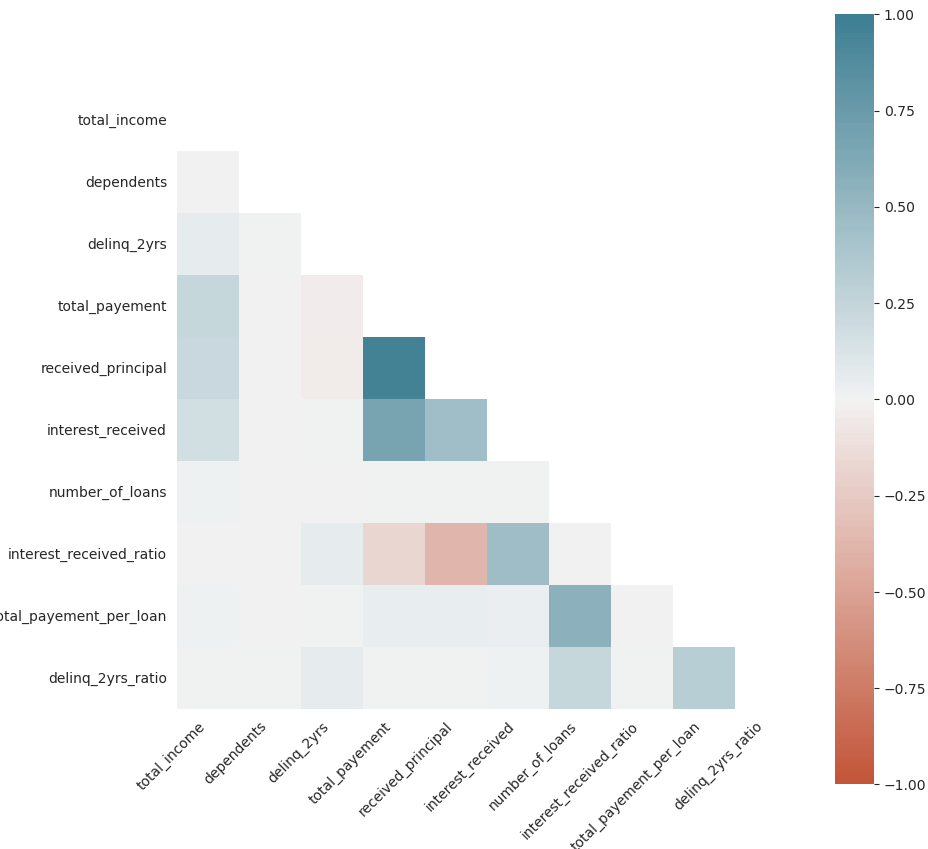

In [27]:
e.correlation_plot()

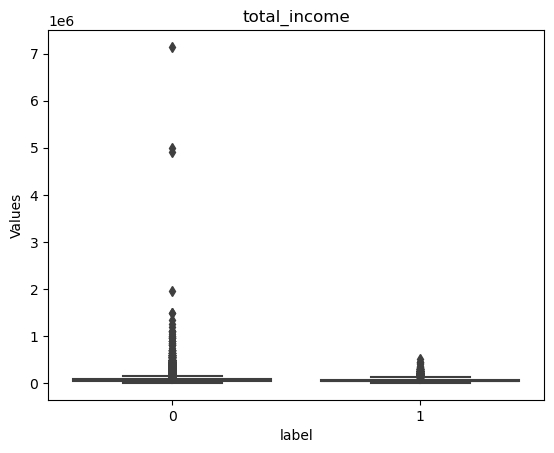

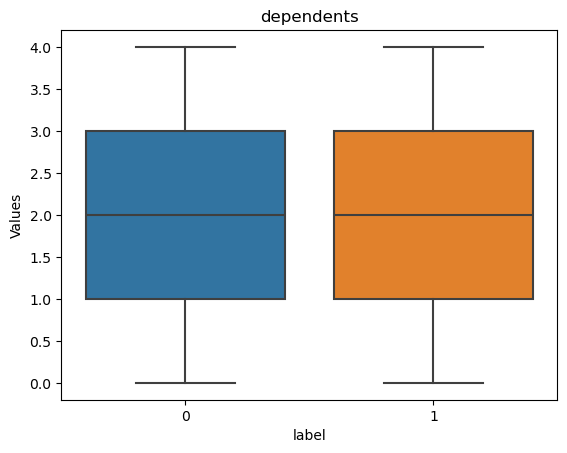

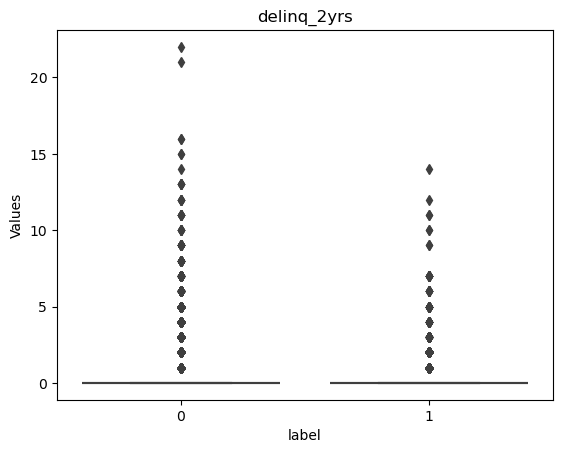

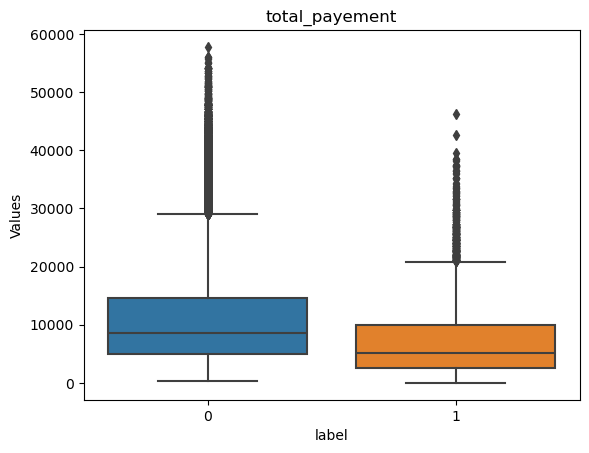

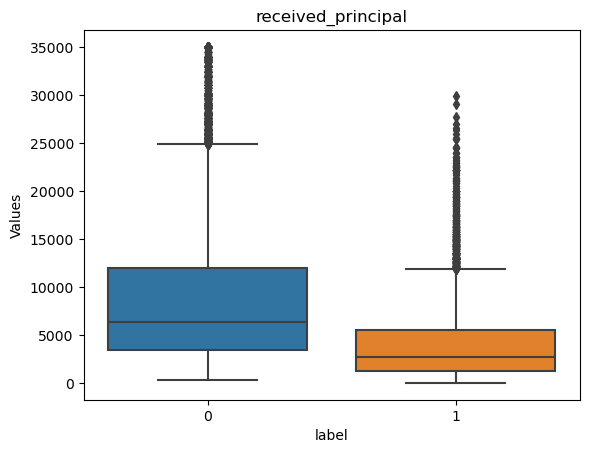

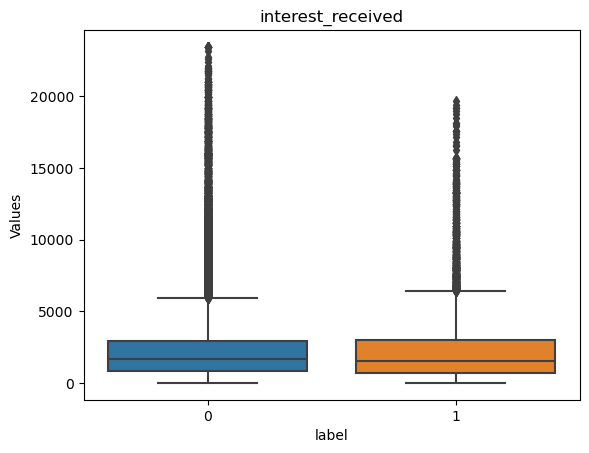

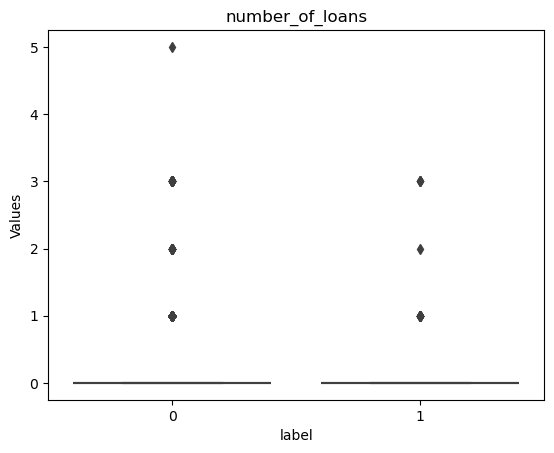

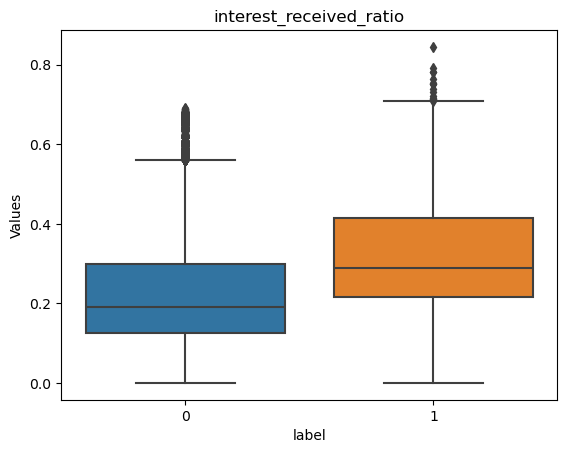

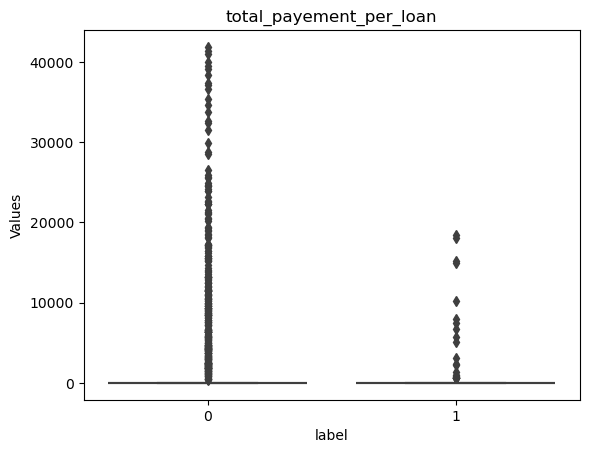

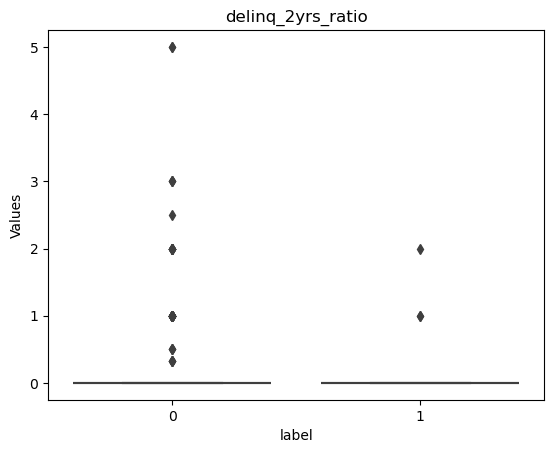

In [28]:
e.box_plot(group = ['label'])

# Categorical Features Transformation

In [34]:
cat_cols = train.drop(columns = id_cols).select_dtypes(include=['category', 'object']).columns
params = {"verbose":0,
          "cols":None,
          "drop_invariant":False,
          "return_df":True,
          "handle_missing":'value',
          "handle_unknown":'value',
          "min_samples_leaf":5000,
          "smoothing":1}
target_encoder = categorical_encoding(params)
target_encoder.fit(train, cat_cols, 'label')

In [35]:
train = target_encoder.transform(train)
val = target_encoder.transform(val)
hold_out = target_encoder.transform(hold_out)

In [36]:
train

,User_id,total_income,dependents,delinq_2yrs,total_payement,received_principal,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,...,employment_type,tier_of_employment,industry,role,work_experience,married,home_type,pincode,has_social_profile,is_verified
0,7013527,125000.000,4,0,1824.150,971.460,852.690,0,0,90,...,0.092,0.085,0.093,0.093,0.093,0.093,0.105,0.093,0.095,0.094
1,7014291,61000.000,1,0,22912.533,18000.000,4912.530,0,0,0,...,0.144,0.146,0.093,0.093,0.093,0.094,0.084,0.093,0.091,0.094
2,7014304,30000.000,1,0,6672.050,5212.290,1459.760,0,0,0,...,0.087,0.087,0.093,0.101,0.093,0.093,0.105,0.093,0.094,0.094
3,7031995,65000.000,3,0,11793.001,10000.000,1793.000,0,0,0,...,0.087,0.087,0.093,0.101,0.093,0.093,0.105,0.093,0.095,0.091
4,7033985,90000.000,4,0,13252.855,11500.000,1733.990,0,0,0,...,0.087,0.087,0.093,0.101,0.145,0.093,0.084,0.093,0.091,0.094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86245,55883413,70000.000,3,2,11277.750,10000.000,1277.750,0,0,0,...,0.087,0.087,0.046,0.100,0.046,0.093,0.084,0.093,0.094,0.094
86246,55973430,30000.000,1,0,3304.000,2350.430,953.570,0,0,0,...,0.087,0.087,0.046,0.093,0.046,0.093,0.084,0.093,0.091,0.094
86247,56263229,27000.000,3,0,839.200,581.670,257.530,0,0,0,...,0.087,0.087,0.046,0.093,0.046,0.093,0.105,0.093,0.095,0.094
86248,56363313,75400.000,0,0,4080.640,3286.820,793.820,0,0,0,...,0.087,0.087,0.046,0.093,0.046,0.094,0.084,0.093,0.091,0.094


# Feature Selection

<br> There can be many methods to do feature selection like Mrmr, KS, Information Gain etc., Random Forest and Deep Decision Tree can also be used as Feature Selection</br>
<br> 
**Random Forest** - Since Random Forest subset features too, so every feature gets chance to split tree
<br> 
**Decision Tree** - Decision Tree Uses Greedy Algorithm to split Tree so choose between 2 correlated features which one is best
<br>
<br>Drop features which are of 0 importance in Random Forest and Decision Tree

In [143]:
df

,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,married,dependents,home_type,pincode,has_social_profile,is_verified,delinq_2yrs,total_payement,received_principal,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.000,Yes,4,rent,XX852X,No,NaN,0,1824.150,971.460,852.690,0,0,90,90,90,90,90,90,202203
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.000,No,1,mortgage,XX286X,NaN,Source Verified,0,22912.533,18000.000,4912.530,0,0,0,0,0,0,0,0,202203
2,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,5-10,100000.000,NaN,3,own,XX113X,No,NaN,0,7800.440,4489.760,3310.680,0,90,90,90,90,90,90,90,202205
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.000,NaN,1,rent,XX941X,Yes,NaN,0,6672.050,5212.290,1459.760,0,0,0,0,0,0,0,0,202203
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.000,NaN,3,rent,XX913X,No,Verified,0,11793.001,10000.000,1793.000,0,0,0,0,0,0,0,0,202203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143722,55993166,NaN,NaN,0,KHMbckjadbckIFGTNSEWdkcndwkcnCCM,0,100000.000,No,2,mortgage,XX374X,NaN,Source Verified,1,12842.400,7193.830,5648.570,0,0,0,0,30,0,0,30,202205
143723,56263229,NaN,NaN,0,KHMbckjadbckIFGOHSEWdkcndwkcnCCM,0,27000.000,Yes,3,rent,XX436X,No,Source Verified,0,839.200,581.670,257.530,0,0,0,0,0,0,0,0,202203
143724,55992716,NaN,NaN,0,KHMbckjadbckIFGCASEWdkcndwkcnCCM,0,53000.000,Yes,2,rent,XX908X,NaN,NaN,0,6085.800,2434.490,3651.310,0,0,0,0,0,0,0,0,202204
143725,56363313,NaN,NaN,0,KHMbckjadbckIFGVASEWdkcndwkcnCCM,0,75400.000,No,0,mortgage,XX229X,NaN,Source Verified,0,4080.640,3286.820,793.820,0,0,0,0,0,0,30,30,202202


In [37]:
# how target encoding work

In [52]:
te=ce.TargetEncoder()

mappingproxy({'__module__': 'category_encoders.target_encoder',
              '__doc__': "Target encoding for categorical features.\n\n    Supported targets: binomial and continuous. For polynomial target support, see PolynomialWrapper.\n\n    For the case of categorical target: features are replaced with a blend of posterior probability of the target\n    given particular categorical value and the prior probability of the target over all the training data.\n\n    For the case of continuous target: features are replaced with a blend of the expected value of the target\n    given particular categorical value and the expected value of the target over all the training data.\n\n    Parameters\n    ----------\n\n    verbose: int\n        integer indicating verbosity of the output. 0 for none.\n    cols: list\n        a list of columns to encode, if None, all string columns will be encoded.\n    drop_invariant: bool\n        boolean for whether or not to drop columns with 0 variance.\n    re

In [31]:
cat_cols = train.drop(columns = id_cols).select_dtypes(include=['category', 'object']).columns
te.fit(train[cat_cols],train['label'])

TargetEncoder(cols=['employment_type', 'tier_of_employment', 'industry', 'role',
                    'work_experience', 'married', 'home_type', 'pincode',
                    'has_social_profile', 'is_verified'])

In [32]:
train_cleaned=te.transform(train[cat_cols])

In [33]:
train_cleaned

,employment_type,tier_of_employment,industry,role,work_experience,married,home_type,pincode,has_social_profile,is_verified
0,0.092,0.085,0.094,0.104,0.136,0.093,0.105,0.103,0.095,0.094
1,0.144,0.146,0.093,0.098,0.137,0.094,0.084,0.099,0.091,0.094
2,0.087,0.087,0.093,0.101,0.171,0.093,0.105,0.064,0.094,0.094
3,0.087,0.087,0.093,0.101,0.137,0.093,0.105,0.107,0.095,0.091
4,0.087,0.087,0.093,0.101,0.145,0.093,0.084,0.138,0.091,0.094
...,...,...,...,...,...,...,...,...,...,...
86245,0.087,0.087,0.046,0.100,0.046,0.093,0.084,0.076,0.094,0.094
86246,0.087,0.087,0.046,0.087,0.046,0.093,0.084,0.087,0.091,0.094
86247,0.087,0.087,0.046,0.084,0.046,0.093,0.105,0.122,0.095,0.094
86248,0.087,0.087,0.046,0.097,0.046,0.094,0.084,0.086,0.091,0.094


## Random Forest

In [38]:
rf=RandomForestClassifier()

In [42]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [44]:
rf_params = {"n_estimators":250, 'criterion':'entropy','verbose':False, 'n_jobs':25}
rf_zero_imp = random_forest_zero_importance(train, id_cols, 'label', rf_params)

In [45]:
rf_zero_imp

17    pincode
Name: features, dtype: object

# Decision Tree

In [48]:
dt_params = {}
dt_zero_imp = decision_tree_zero_importance(train, id_cols, 'label', dt_params)

In [49]:
dt_zero_imp

9     delinq_2yrs_ratio
17              pincode
Name: features, dtype: object

In [51]:
drop_cols=list(set(dt_zero_imp)&set(rf_zero_imp))
drop_cols

['pincode']

Since Pincode is of 0 importanc in Random Forest and Decision Tree, we will drop this features in model

# Model Development
## Hyperparameter Tuning

We will try to search hyperparameter using Hyperopt, Following are relevant links to understand Hyperopt better
- [Paper](https://conference.scipy.org/proceedings/scipy2013/pdfs/bergstra_hyperopt.pdf)
- [Library](http://hyperopt.github.io/hyperopt/)

Hyperopt tries to minimize of score (to be defined by user) by smartly iterating though various combination of hypeparameters in given space
<br>
Score = (Train ROC AUC - Val ROC AUC + 1)/(Val ROC AUC)
<br>
<br>
**Intution**
- Train ROC AUC - Val ROC AUC will reduce overfitting
<br> 
- 1/(Val ROC AUC) will increase ROC AUC for Validation Set
</br>
After Every Iteration we are appending results to the results of existing runs and saving to hyperopt_results.csv, so in case we halt the run in between, we will not loose results

<br></br>
**Setting**
<br>- Loss Function = LogLoss
<br>- Implementation = Lightgbm Implementation of Boosting Algorithm 
<br>- Primary Evalution Metric - ROC AUC
<br>- Hypeparameter Selection - Hyperopt

In [60]:
mylist=[(1,2),(1,2),(1,2),(1,2),(1,2)]
mydict={1:[1,2,3,4],2:[3,5,6,7]}

In [61]:
d=pd.DataFrame(mydict)

In [62]:
d

,1,2
0,1,3
1,2,5
2,3,6
3,4,7


In [63]:
space = {
    'num_leaves': hp.quniform('num_leaves', 2, 24, 1), # Uniform integer between 2 and 24
    'max_depth': hp.quniform('max_depth', 2, 12, 1), # Uniform integer between 2 and 12
    'learning_rate': hp.uniform('learning_rate', 0.005, 0.015), # Values between 0.005 to 0.015
    'feature_fraction' : hp.uniform('feature_fraction', 0.1, 1), # Values between 0.1 to 1
    'max_bin' : hp.quniform('max_bin', 10, 100, 10),
    'min_data_in_leaf' : hp.quniform('min_data_in_leaf', 25, 1000, 25),
    'lambda_l1' : hp.uniform('lambda_l1', 0, 50),
    'lambda_l2' : hp.uniform('lambda_l2', 0, 50),
    'min_data_in_bin' : hp.quniform('min_data_in_bin', 5, 100, 5),
    'pos_bagging_fraction' : hp.uniform('pos_bagging_fraction', 0.1, 1),
    'neg_bagging_fraction' : hp.uniform('neg_bagging_fraction', 0.1, 1)
    }

In [81]:
    params = {
        'num_leaves': int(space['num_leaves']),
        'max_depth': int(space['max_depth']),
        'learning_rate': space['learning_rate'],
        'objective': 'binary',
        'metric': 'auc',
        "boosting": "gbdt",
        'feature_fraction' : space['feature_fraction'],
        'max_bin' : (space['max_bin']),
        'min_data_in_leaf': (space['min_data_in_leaf']),
        "min_data_in_bin": (space['min_data_in_bin']),
        "bagging_freq": 20,
        "random_seed": 2019,
        "lambda_l1": space['lambda_l1'],
        "lambda_l2": space['lambda_l2'],
        'pos_bagging_fraction' : space['pos_bagging_fraction'],
        'neg_bagging_fraction' : space['neg_bagging_fraction'],
        'verbose': -1
    }

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'Apply'

In [67]:
params

{'num_leaves': <hyperopt.pyll.base.Apply at 0x222dc226b90>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x222dc224090>,
 'learning_rate': <hyperopt.pyll.base.Apply at 0x222dc213b50>,
 'objective': 'binary',
 'metric': 'auc',
 'boosting': 'gbdt',
 'feature_fraction': <hyperopt.pyll.base.Apply at 0x222dc210150>,
 'max_bin': <hyperopt.pyll.base.Apply at 0x222dc212690>,
 'min_data_in_leaf': <hyperopt.pyll.base.Apply at 0x222dc155d10>,
 'min_data_in_bin': <hyperopt.pyll.base.Apply at 0x222dc21dd50>,
 'bagging_freq': 20,
 'random_seed': 2019,
 'lambda_l1': <hyperopt.pyll.base.Apply at 0x222dc1575d0>,
 'lambda_l2': <hyperopt.pyll.base.Apply at 0x222dc21c7d0>,
 'pos_bagging_fraction': <hyperopt.pyll.base.Apply at 0x222dc21f210>,
 'neg_bagging_fraction': <hyperopt.pyll.base.Apply at 0x222dc2391d0>,
 'verbose': -1}

In [73]:
result = pd.DataFrame(params,index=[2])

In [74]:
result

,num_leaves,max_depth,learning_rate,objective,metric,boosting,feature_fraction,max_bin,min_data_in_leaf,min_data_in_bin,bagging_freq,random_seed,lambda_l1,lambda_l2,pos_bagging_fraction,neg_bagging_fraction,verbose
2,0 float\n1 hyperopt_param\n2 Literal{num...,0 float\n1 hyperopt_param\n2 Literal{max...,0 float\n1 hyperopt_param\n2 Literal{lea...,binary,auc,gbdt,0 float\n1 hyperopt_param\n2 Literal{fea...,0 float\n1 hyperopt_param\n2 Literal{max...,0 float\n1 hyperopt_param\n2 Literal{min...,0 float\n1 hyperopt_param\n2 Literal{min...,20,2019,0 float\n1 hyperopt_param\n2 Literal{lam...,0 float\n1 hyperopt_param\n2 Literal{lam...,0 float\n1 hyperopt_param\n2 Literal{pos...,0 float\n1 hyperopt_param\n2 Literal{neg...,-1


In [77]:
lgb_train = lgb.Dataset(train.drop(columns = id_cols+drop_cols), label = train.label)
lgb_val = lgb.Dataset(val.drop(columns = id_cols+drop_cols), label = val.label)

In [80]:
evals_result={}
clf = lgb.train( params,lgb_train, 20000, valid_sets=lgb_val,
                valid_names='val',
                early_stopping_rounds=50,
                verbose_eval=False, evals_result=evals_result)

TypeError: argument of type 'Dataset' is not iterable

In [88]:
result_ho = pd.DataFrame()
i = 0

## Defining Objective Function
## will return the score to optimise
def objective(space):
    
    global i
    global result_ho
    
    #Creating Lightgbm DataFrame
    lgb_train = lgb.Dataset(train.drop(columns = id_cols+drop_cols), label = train.label)
    lgb_val = lgb.Dataset(val.drop(columns = id_cols+drop_cols), label = val.label)

    #Parameters of model
    params = {
        'num_leaves': int(space['num_leaves']),
        'max_depth': int(space['max_depth']),
        'learning_rate': space['learning_rate'],
        'objective': 'binary',
        'metric': 'auc',
        "boosting": "gbdt",
        'feature_fraction' : space['feature_fraction'],
        'max_bin' : int(space['max_bin']),
        'min_data_in_leaf': int(space['min_data_in_leaf']),
        "min_data_in_bin": int(space['min_data_in_bin']),
        "bagging_freq": 20,
        "random_seed": 2019,
        "lambda_l1": space['lambda_l1'],
        "lambda_l2": space['lambda_l2'],
        'pos_bagging_fraction' : space['pos_bagging_fraction'],
        'neg_bagging_fraction' : space['neg_bagging_fraction'],
        'verbose': -1
    }

    evals_result = {}
    
    clf = lgb.train(params, lgb_train, 20000, valid_sets=lgb_val,
                valid_names='val',
                early_stopping_rounds=50,
                verbose_eval=False, evals_result=evals_result)
    gc.collect()
    
    result = pd.DataFrame(clf.params, index=[0])
    
    ## Calculating AUC
    pred_train = clf.predict(train[clf.feature_name()])
    pred_val = clf.predict(val[clf.feature_name()])
    pred_hold_out = clf.predict(hold_out[clf.feature_name()])

    gc.collect()
    train_auc = roc_auc_score(train.label, pred_train)#, num_iteration=clf.best_iteration)
    val_auc = roc_auc_score(val.label, pred_val)#, num_iteration=clf.best_iteration)
    hold_out_auc = roc_auc_score(hold_out.label, pred_hold_out)#, num_iteration=clf.best_iteration)
    gc.collect()

    score = (abs(train_auc - val_auc) + 1)/((1+val_auc)*(1+val_auc))
    
    result["train_auc"] = train_auc
    result["val_auc"] = val_auc
    result["hold_out_auc"] = hold_out_auc
    result["train_test_diff"] = train_auc - val_auc
    result["n_estimators"] = clf.best_iteration
    result["score"] = score
    
    del clf
    
    result_ho = pd.concat([result_ho,result],ignore_index=True)
    result_ho.to_csv('hyperopt_results.csv', index=False)
    i = i+1
    
    return (score)

In [89]:
space = {
    'num_leaves': hp.quniform('num_leaves', 2, 24, 1), # Uniform integer between 2 and 24
    'max_depth': hp.quniform('max_depth', 2, 12, 1), # Uniform integer between 2 and 12
    'learning_rate': hp.uniform('learning_rate', 0.005, 0.015), # Values between 0.005 to 0.015
    'feature_fraction' : hp.uniform('feature_fraction', 0.1, 1), # Values between 0.1 to 1
    'max_bin' : hp.quniform('max_bin', 10, 100, 10),
    'min_data_in_leaf' : hp.quniform('min_data_in_leaf', 25, 1000, 25),
    'lambda_l1' : hp.uniform('lambda_l1', 0, 50),
    'lambda_l2' : hp.uniform('lambda_l2', 0, 50),
    'min_data_in_bin' : hp.quniform('min_data_in_bin', 5, 100, 5),
    'pos_bagging_fraction' : hp.uniform('pos_bagging_fraction', 0.1, 1),
    'neg_bagging_fraction' : hp.uniform('neg_bagging_fraction', 0.1, 1)
    }

In [90]:
best=fmin(fn = objective, # function to optimize
          space = space, # space from which hyperparameter to be choosen
          algo = tpe.suggest, # optimization algorithm, hyperopt will select its parameters automatically
          max_evals = 50,
          rstate = np.random.default_rng(7)
         )

100%|██████████| 50/50 [14:41<00:00, 17.64s/trial, best loss: 0.26055619307290495]


In [91]:
hyperopt_results=pd.read_csv('hyperopt_results.csv')

In [94]:
hyperopt_results.sort_values(by='score').head()

,num_leaves,max_depth,learning_rate,objective,metric,boosting,feature_fraction,max_bin,min_data_in_leaf,min_data_in_bin,...,neg_bagging_fraction,verbose,num_iterations,early_stopping_round,train_auc,val_auc,hold_out_auc,train_test_diff,n_estimators,score
21,12,9,0.010,binary,auc,gbdt,0.669,100,625,30,...,0.544,-1,20000,50,0.971,0.965,0.964,0.006,3041,0.261
24,13,8,0.007,binary,auc,gbdt,0.679,100,1000,25,...,0.515,-1,20000,50,0.969,0.964,0.963,0.006,5096,0.261
37,8,7,0.009,binary,auc,gbdt,0.951,80,125,30,...,0.341,-1,20000,50,0.968,0.963,0.963,0.005,4420,0.261
22,12,9,0.009,binary,auc,gbdt,0.672,70,650,25,...,0.554,-1,20000,50,0.970,0.964,0.962,0.006,3489,0.261
27,7,10,0.008,binary,auc,gbdt,0.745,100,775,15,...,0.502,-1,20000,50,0.966,0.962,0.961,0.004,6067,0.261


In [95]:
hyperopt_results.sort_values(by='val_auc',ascending=False).head(5)

,num_leaves,max_depth,learning_rate,objective,metric,boosting,feature_fraction,max_bin,min_data_in_leaf,min_data_in_bin,...,neg_bagging_fraction,verbose,num_iterations,early_stopping_round,train_auc,val_auc,hold_out_auc,train_test_diff,n_estimators,score
21,12,9,0.010,binary,auc,gbdt,0.669,100,625,30,...,0.544,-1,20000,50,0.971,0.965,0.964,0.006,3041,0.261
25,16,8,0.006,binary,auc,gbdt,0.697,100,975,30,...,0.480,-1,20000,50,0.971,0.964,0.963,0.007,6822,0.261
3,19,9,0.009,binary,auc,gbdt,0.475,70,100,60,...,0.894,-1,20000,50,0.973,0.964,0.963,0.008,3496,0.261
24,13,8,0.007,binary,auc,gbdt,0.679,100,1000,25,...,0.515,-1,20000,50,0.969,0.964,0.963,0.006,5096,0.261
22,12,9,0.009,binary,auc,gbdt,0.672,70,650,25,...,0.554,-1,20000,50,0.970,0.964,0.962,0.006,3489,0.261


In [98]:
best_param_index=hyperopt_results.index[hyperopt_results['score']==hyperopt_results['score'].min()].to_list()[0]

In [99]:
best_param_index

21

In [100]:
hyperopt_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_leaves            50 non-null     int64  
 1   max_depth             50 non-null     int64  
 2   learning_rate         50 non-null     float64
 3   objective             50 non-null     object 
 4   metric                50 non-null     object 
 5   boosting              50 non-null     object 
 6   feature_fraction      50 non-null     float64
 7   max_bin               50 non-null     int64  
 8   min_data_in_leaf      50 non-null     int64  
 9   min_data_in_bin       50 non-null     int64  
 10  bagging_freq          50 non-null     int64  
 11  random_seed           50 non-null     int64  
 12  lambda_l1             50 non-null     float64
 13  lambda_l2             50 non-null     float64
 14  pos_bagging_fraction  50 non-null     float64
 15  neg_bagging_fraction  50 

In [101]:
lgbm_params=dict(hyperopt_results.iloc[best_param_index,:19])

In [102]:
lgbm_params

{'num_leaves': 12,
 'max_depth': 9,
 'learning_rate': 0.0100646503850957,
 'objective': 'binary',
 'metric': 'auc',
 'boosting': 'gbdt',
 'feature_fraction': 0.6689684436651296,
 'max_bin': 100,
 'min_data_in_leaf': 625,
 'min_data_in_bin': 30,
 'bagging_freq': 20,
 'random_seed': 2019,
 'lambda_l1': 1.1183880580478147,
 'lambda_l2': 1.748336004645278,
 'pos_bagging_fraction': 0.6594746296368389,
 'neg_bagging_fraction': 0.5439750792861977,
 'verbose': -1,
 'num_iterations': 20000,
 'early_stopping_round': 50}

In [104]:
lgb_train=lgb.Dataset(train.drop(columns=id_cols+drop_cols),label=train['label'])
lgb_val=lgb.Dataset(val.drop(columns=id_cols+drop_cols),label=val['label'])
evals_result={}
clf=lgb.train(lgbm_params,lgb_train,valid_sets=lgb_val,
             valid_names='val',
             early_stopping_rounds=50,
             verbose_eval=False,
             evals_result=evals_result)

In [110]:
pred_train=clf.predict(train[clf.feature_name()])
pred_val=clf.predict(val[clf.feature_name()])
pred_hold_out=clf.predict(hold_out[clf.feature_name()])

In [111]:
roc_auc_score(train['label'],pred_train)

0.9709666608309787

### ROC AUC, PR AUC, KS Stats

In [116]:
#Printing ROC AUC, PR AUC for Class 1 and Class 0
print("ROC AUC")
roc_auc([train.label,val.label,hold_out.label], [pred_train, pred_val, pred_hold_out])
print("")
print("Class 1 PR AUC")
pr_auc([train.label,val.label,hold_out.label], [pred_train, pred_val, pred_hold_out])
print("")
print("Class 0 PR AUC")
pr_auc([1-train.label,1-val.label,1-hold_out.label], [1-pred_train, 1-pred_val, 1-pred_hold_out])
print("")

ROC AUC
0.9709666608309787
0.9649508759429978
0.9635950364843274

Class 1 PR AUC
0.883796268964256
0.8792279856483648
0.8678364668760414

Class 0 PR AUC
0.9963933861427327
0.9949638969488055
0.9953873339982944



In [114]:
precision_recall_curve(train['label'],pred_train)

(array([0.09334493, 0.09334601, 0.09334709, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.48416346e-04, 1.24208173e-04, 0.00000000e+00]),
 array([2.63944065e-05, 3.14883810e-05, 3.18203270e-05, ...,
        9.99959396e-01, 9.99961347e-01, 9.99965307e-01]))

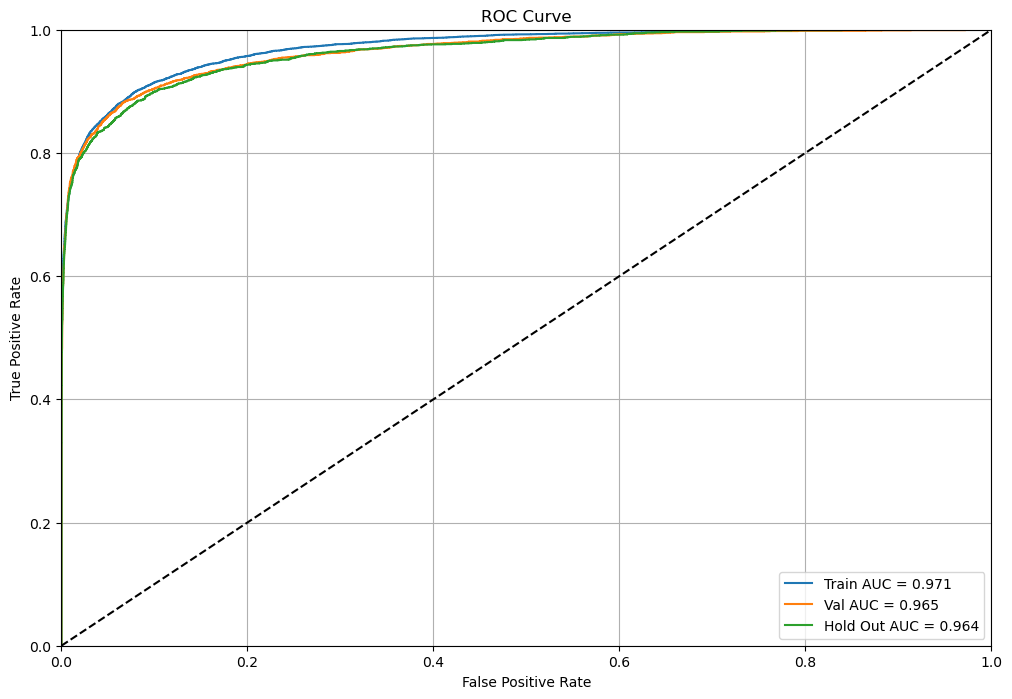

In [117]:
roc_auc_curve([train.label,val.label,hold_out.label], [pred_train, pred_val, pred_hold_out])

PR Curve for Class 1


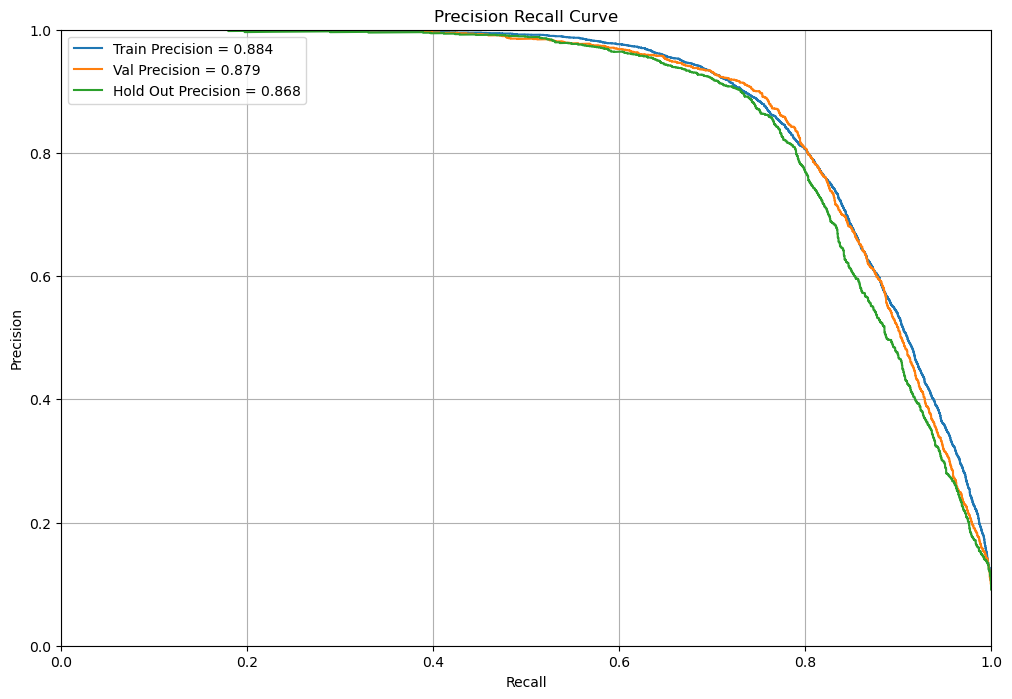

In [118]:
print("PR Curve for Class 1")
pr_auc_curve([train.label,val.label,hold_out.label], [pred_train, pred_val, pred_hold_out])

OptionError: No such keys(s): 'mode.use_inf_as_null'

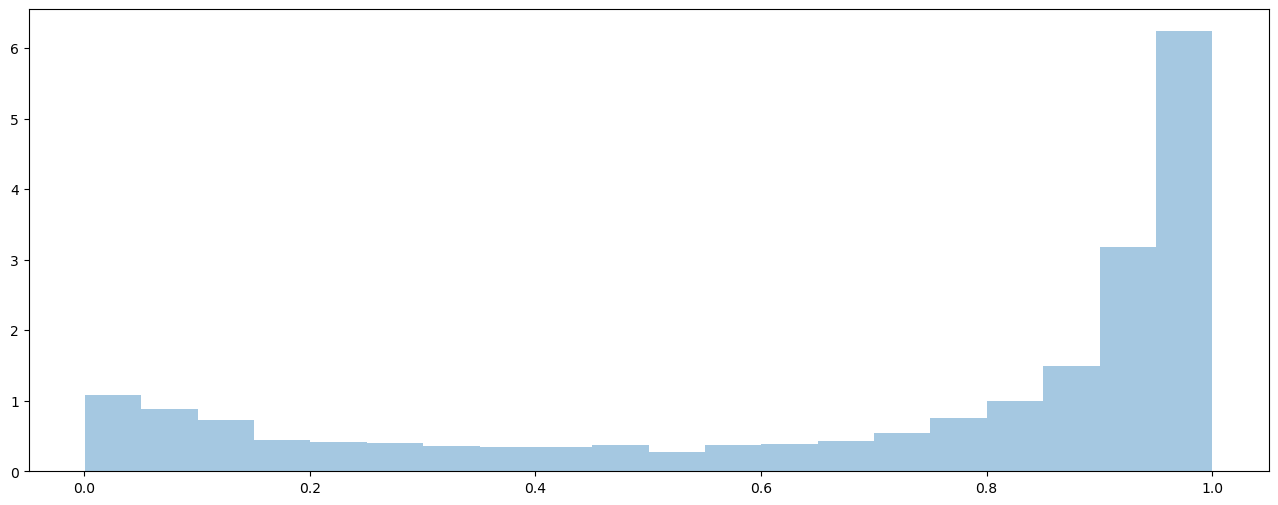

In [119]:
score_distribution([train.label,val.label,hold_out.label], [pred_train, pred_val, pred_hold_out], ["Train","Val","Hold Out"])

In [120]:
feature_importance = pd.DataFrame({"feature":clf.feature_name(),"split":clf.feature_importance('split'), "gain":clf.feature_importance('gain')}).sort_values(by = 'gain', ascending = False)
feature_importance.iloc[:10,:]

,feature,split,gain
4,received_principal,8140,442117.261
7,interest_received_ratio,6914,268705.206
12,industry,1226,140634.732
3,total_payement,5845,129490.195
5,interest_received,3896,88885.044
14,work_experience,552,46334.458
11,tier_of_employment,1905,29678.155
0,total_income,2541,22366.545
10,employment_type,352,3008.691
1,dependents,453,1711.251


TypeError: summary_legacy() got an unexpected keyword argument 'ax'

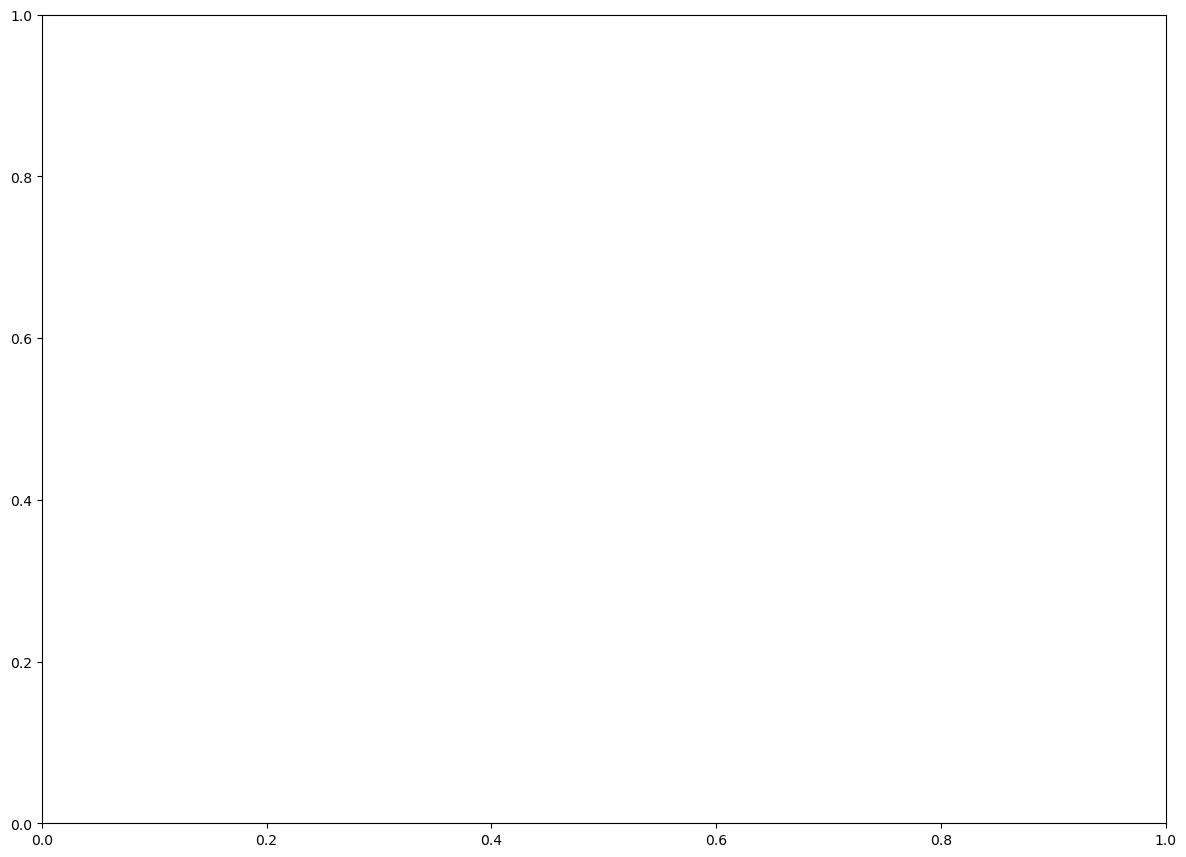

In [124]:
import shap
data_list = [train,val,hold_out]
data_type_list = ['Training', 'Validation', 'Hold Out']
shap_importance(clf, data_list, data_type_list)

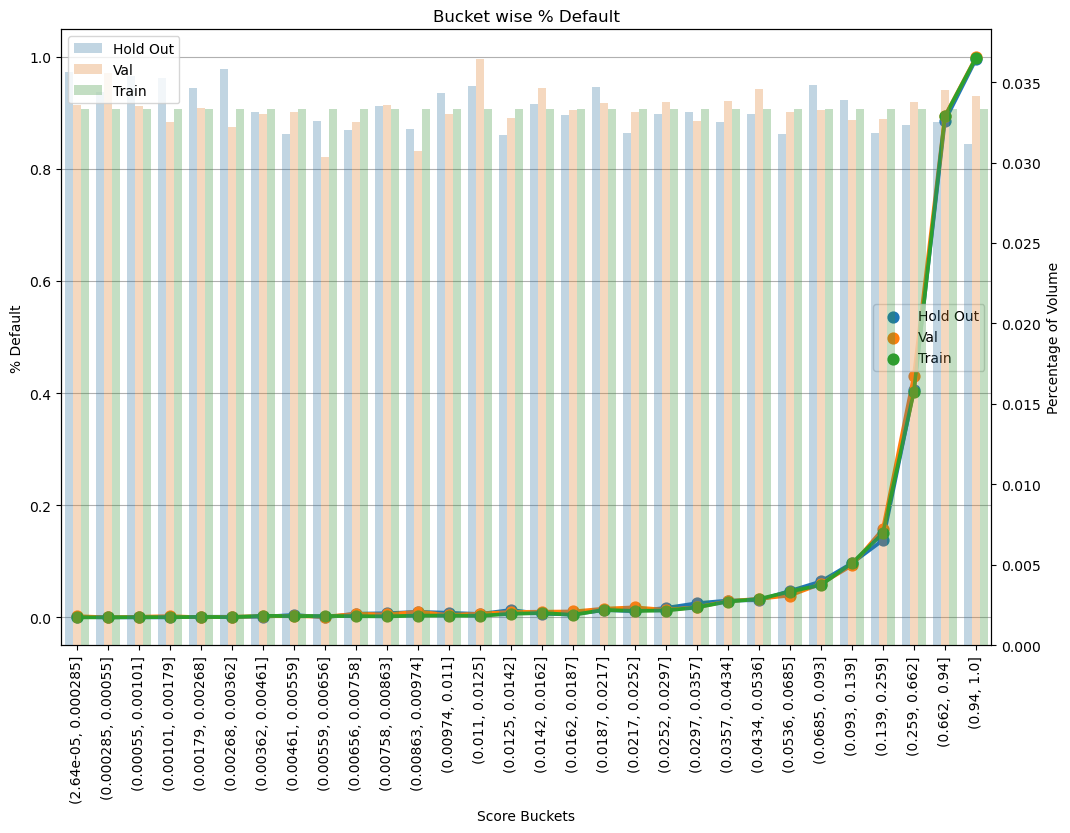

In [122]:
target_list = [train.label, val.label, hold_out.label]
pred_list = [pred_train, pred_val, pred_hold_out]
data_type_list = ['Train', 'Val', 'Hold Out']
class_rate(target_list, pred_list, data_type_list)

In [123]:
cutoff_score(val.label, pred_val, 0.01)

0.06616398453599784